In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!cp /gdrive/MyDrive/tmp/realblocks.zip ./

In [ ]:
!ls -al

total 752628
drwxr-xr-x 1 root root      4096 Jul 26 02:36 .
drwxr-xr-x 1 root root      4096 Jul 26 02:36 ..
drwxr-xr-x 4 root root      4096 Jul 13 13:42 .config
-rw------- 1 root root 770667752 Jul 26 02:36 realblocks.zip
drwxr-xr-x 1 root root      4096 Jul 13 13:43 sample_data


In [ ]:
!unzip realblocks.zip

Archive:  realblocks.zip
   creating: realblocks/train/
  inflating: realblocks/train/IMG_1779.JPG  
  inflating: realblocks/train/IMG_1780.JPG  
  inflating: realblocks/train/IMG_1781.JPG  
  inflating: realblocks/train/IMG_1782.JPG  
  inflating: realblocks/train/IMG_1783.JPG  
  inflating: realblocks/train/IMG_1784.JPG  
  inflating: realblocks/train/IMG_1785.JPG  
  inflating: realblocks/train/IMG_1786.JPG  
  inflating: realblocks/train/IMG_1787.JPG  
  inflating: realblocks/train/IMG_1788.JPG  
  inflating: realblocks/train/IMG_1789.JPG  
  inflating: realblocks/train/IMG_1790.JPG  
  inflating: realblocks/train/IMG_1791.JPG  
  inflating: realblocks/train/IMG_1792.JPG  
  inflating: realblocks/train/IMG_1793.JPG  
  inflating: realblocks/train/IMG_1794.JPG  
  inflating: realblocks/train/IMG_1795.JPG  
  inflating: realblocks/train/IMG_1796.JPG  
  inflating: realblocks/train/IMG_1797.JPG  
  inflating: realblocks/train/IMG_1798.JPG  
  inflating: realblocks/train/IMG_1799.JPG  

In [ ]:
!ls -al realblocks/train

total 1049028
drwxr-xr-x 2 root root     4096 Jul 25 16:02 .
drwxr-xr-x 3 root root     4096 Jul 26 02:36 ..
-rw-r--r-- 1 root root  8614216 Jul 25 14:47 IMG_1779.JPG
-rw-r--r-- 1 root root  4520058 Jul 25 14:48 IMG_1780.JPG
-rw-r--r-- 1 root root  4470949 Jul 25 14:48 IMG_1781.JPG
-rw-r--r-- 1 root root  4372201 Jul 25 14:48 IMG_1782.JPG
-rw-r--r-- 1 root root  4288202 Jul 25 14:48 IMG_1783.JPG
-rw-r--r-- 1 root root  3980412 Jul 25 14:48 IMG_1784.JPG
-rw-r--r-- 1 root root  4096012 Jul 25 14:48 IMG_1785.JPG
-rw-r--r-- 1 root root  4447705 Jul 25 14:48 IMG_1786.JPG
-rw-r--r-- 1 root root  4013330 Jul 25 14:48 IMG_1787.JPG
-rw-r--r-- 1 root root  4202405 Jul 25 14:48 IMG_1788.JPG
-rw-r--r-- 1 root root  4543351 Jul 25 14:48 IMG_1789.JPG
-rw-r--r-- 1 root root  4322723 Jul 25 14:48 IMG_1790.JPG
-rw-r--r-- 1 root root  4143967 Jul 25 14:48 IMG_1791.JPG
-rw-r--r-- 1 root root  4013909 Jul 25 14:48 IMG_1792.JPG
-rw-r--r-- 1 root root  4085004 Jul 25 14:48 IMG_1793.JPG
-rw-r--r-- 1 root roo

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


import random
import pickle
import cv2
import matplotlib


In [ ]:
def my_preprocess_input(image):
  return image/255

BATCH_SIZE = 32

data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=my_preprocess_input
)

iterator = data_aug_generator.flow_from_directory(
      "realblocks",
      target_size=(512,512),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 166 images belonging to 1 classes.


In [ ]:
data_count = len(iterator.labels)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)

# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 166
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 6
FETCH_COUNT : 12
(332, 512, 512, 3)
(332,)


In [ ]:
print(augmented_train_x)

[[[[0.4035912  0.39182645 0.35981074]
   [0.32932803 0.31984395 0.27770802]
   [0.33990425 0.32978228 0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  [[0.3962979  0.3845332  0.3522822 ]
   [0.33073965 0.32137316 0.27888435]
   [0.3394337  0.3291941  0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  [[0.38900465 0.37723994 0.34475368]
   [0.33215123 0.32290238 0.28006068]
   [0.3389632  0.32860595 0.29411766]
   ...
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]
   [0.34901962 0.35686275 0.3529412 ]]

  ...

  [[0.05948569 0.11046608 0.17439263]
   [0.05940764 0.11038803 0.17332831]
   [0.07397238 0.12495277 0.18769787]
   ...
   [0.8482022  0.7305552  0.5187904 ]
   [0.84784937 0.7302023  0.51843756]
   [0.84749645 0.72984934 0.51808465]]

  [[0.06094626 0.11192665 0.17467175]
   [0.0

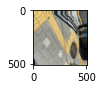

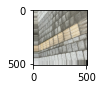

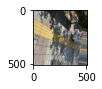

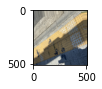

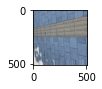

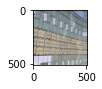

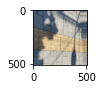

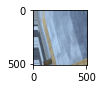

In [ ]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

In [ ]:
aug_x_load = np.load('/gdrive/MyDrive/new_augx.npy')
print(aug_x_load.shape)
for i in [0,2]:
  plt.figure(figsize=(32,32))
  plt.imshow(aug_x_load[i])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
augmented_train_x = augmented_train_x.astype("float32") / 255.0

In [ ]:
print(augmented_train_x.shape)
print(np.max(augmented_train_x))
print(np.min(augmented_train_x))

(1660, 512, 512, 3)
0.003921569
0.0


In [ ]:
np.save('/gdrive/MyDrive/augx_save', augmented_train_x)

In [ ]:
aug_x_load = np.load('/gdrive/MyDrive/augx_save.npy')
print(aug_x_load)

[[[[1.21460564e-03 1.49142230e-03 1.86051114e-03]
   [1.23228622e-03 1.49984204e-03 1.87356118e-03]
   [1.36093318e-03 1.60699245e-03 1.99145987e-03]
   ...
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]]

  [[1.22126227e-03 1.49807881e-03 1.86716765e-03]
   [1.21431355e-03 1.48320082e-03 1.85625430e-03]
   [1.38423103e-03 1.63029018e-03 2.01475760e-03]
   ...
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]]

  [[1.22791866e-03 1.50473532e-03 1.87382405e-03]
   [1.19634112e-03 1.46655948e-03 1.83894741e-03]
   [1.40752876e-03 1.65358791e-03 2.03805533e-03]
   ...
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]
   [1.92233757e-03 1.92233757e-03 1.89158018e-03]]

  ...

  [[1.19305216e-03 1.47092238e-03 1.81030750e-03]
   [1.07858062e-